### 과제 : mnist-784 데이터셋을 이용하여 CNN 학습하기

1. Load mnist-784 dataset

In [1]:
# 1. Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', version='active', as_frame=True)

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.MNIST(
    root="mnist_784",
    train=True,
    download=True,
    transform=ToTensor()
)

In [3]:
training_data.data.shape, training_data[0][0]

(torch.Size([60000, 28, 28]),
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.

두 가지 방법이 있따

In [4]:
# mnist.__dir__()

In [5]:
# print(mnist.data.shape, mnist.target.shape, len(mnist.feature_names), mnist.target_names)
# print(mnist.target.value_counts().sort_index())
# print(mnist.categories)

In [6]:
# 파일 형식 확인
# print(mnist.data.head(10))

(70000, 784), (70000,) => 70,000개의 28x28 이미지 데이터, 레이블 분배는 균등

In [7]:
# 2. dataset
# - Dataset, dataloader 모듈
import torch
from torch.utils.data import Dataset, DataLoader

# class Newdataset(Dataset):
#     def __init__(self, data, target):
#         super(Newdataset, self).__init__()
#         self.feature = torch.tensor(data.values, dtype=torch.float32)
#         self.target = torch.tensor(target.values, dtype=torch.long)
        

...바로 tensor로 만들어주는 함수를 오늘 배웠다...!

In [8]:
testing_data = datasets.MNIST(
    root="mnist_784",
    train=False,
    download=True,
    transform=ToTensor()
)

In [9]:
testing_data.data.shape, testing_data[0]

(torch.Size([10000, 28, 28]),
 (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

=> train : 60,000개, test : 10,000개, 10개의 클래스, 28x28 이미지

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


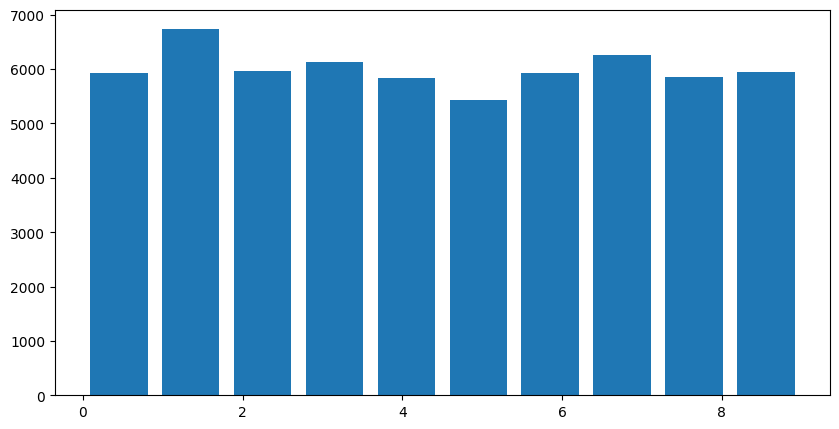

In [35]:
# 클래스 분포도 확인 : histogram
from matplotlib import pyplot as plt

print(training_data.targets.unique())
plt.figure(figsize=(10, 5))
plt.hist(training_data.targets, bins=10, rwidth=0.8)
plt.show()

타깃 클래스의 분포는 일정하다. 정확도 평가 가능!

2. DataLoader로 batch 단위 구분
<hr>

In [10]:
# 1. Load Module
import torch
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# 2. DataLoader
BATCHS = 128
seed = torch.Generator().manual_seed(11)
train_dataloader = DataLoader(training_data, BATCHS, shuffle=True, generator=seed)
test_dataloader = DataLoader(testing_data, BATCHS, shuffle=True, generator=seed)

In [11]:
# shape
for x, y in train_dataloader:
    print(x.shape, y.shape)
    break   # [128, 1, 28, 28] [128] batch, channel, height, width / batch

torch.Size([128, 1, 28, 28]) torch.Size([128])


3. CNN 모델 구현
<hr>

max_pool2d() : 고려사항
    1. kernel_size : pooling을 수행할 영역의 크기

In [12]:
# 1. Load Module
from torch import nn
import torch.nn.functional as F

# 2. Create CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding = 1) 
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding = 1)
        self.fc1 = nn.Linear(7 * 7 * 32, 32)
        self.fc2 = nn.Linear(32, 10)     
        self.max_pool2d = nn.MaxPool2d(2)
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        out = self.conv1(x)                         # '1' x 28 x 28 -> '16' x 28 x 28
        out = self.max_pool2d(self.tanh(out))       # 16 x '28' x '28' -> 16 x '14' x '14'
        out = self.conv2(out)                       # '16' x 14 x 14 -> '32' x 14 x 14
        out = self.max_pool2d(self.tanh(out))       # 32 x '14' x '14' -> 32 x '7' x '7'
        out = out.view(-1, 7 * 7 * 32)              # 32 x 7 x 7 -> 1 x 1568 (= 32 x 7 x 7)
        out = self.tanh(self.fc1(out))              # 1568 -> 32
        out = self.fc2(out)                         # 32 -> 10
        return out
    
    # max_pooling : 특정 영역에서 가장 큰 값만 추출
    # max_pool2d : 2차원 max_pooling
    # Conv2d : 2차원 convolution
    # convolution : 이미지의 특징을 추출하는 기법
    # padding=1 : 이미지의 크기를 유지하기 위해 padding을 추가; 1픽셀씩 추가
    # kernel_size=3 : 3x3 크기의 kernel을 사용
    
    # 입력할 데이터 : 28x28 크기의 이미지, 1채널, batch size = 128, 10개의 클래스
    # Conv2d(1, 16, kernel_size=3, padding=1) : 1채널의 이미지를 16개의 특징으로 추출
    # Conv2d(16, 32, kernel_size=3, padding=1) : 16개의 특징을 32개의 특징으로 추출
    # Linear(7*7*32, 32) : 7x7 크기의 이미지, 32개의 특징
    # Linear(32, 2) : 32개의 특징을 2개의 클래스로 분류
    # MaxPool2d(2) : 2x2 크기의 max pooling
    # Tanh() : 활성화 함수로 tanh 사용
    # view(-1, 7*7*32) : 1차원으로 변환

max_pool2d(torch.tanh(self.conv1(x)), 2)  
=> 여기서 2 때문에 오류가 난 것,,,,, 2x2 크기로 pooling을 수행한다는 뜻이다.  
한 번 더 1/2로 줄어든 것.

4. 학습 함수 생성 : Loss function, Optimizer 정의
<hr>

- to(DEVICE) 는 우선 생략

In [14]:
# 1. Create training function
model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def training(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch_idx, (image, label) in enumerate(dataloader):
        optimizer.zero_grad()   # gradient 초기화
        output = model(image)   # forward
        loss = loss_fn(output, label)  # loss 계산
        loss.backward()         # backword
        optimizer.step()        # update
        
        if batch_idx % 100 == 0:
            print(f"batch {batch_idx}, loss {loss.item():.5f}")
    

In [15]:
train_dataloader.dataset.data[0], train_dataloader.dataset.targets[0]

(tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
           18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

In [16]:
from torchviz import make_dot
# make_dot(train_dataloader.dataset.data[0], params=dict(model.named_parameters()))

In [17]:
from torchviz import make_dot

for data, target in train_dataloader:
    # print(data.shape, target.shape)
    make_dot(model(data), params=dict(model.named_parameters()))
    break

In [18]:
# Function test : train_dataloader
# training(train_dataloader, model, loss_fn, optimizer)

5. 평가 함수 생성 : Accuracy 계산 
<hr>

In [19]:
from torchmetrics.functional import accuracy

def evaluate(model, test_dataloader):
    model.eval()
    with torch.no_grad():
        for batch_idx, (image, label) in enumerate(test_dataloader):
            output = model(image)
            loss =  loss_fn(output, label).item()
            acc = accuracy(output, label, task='multiclass', num_classes=10)
            
            # 교재 : predicts.eq(label.view_as(predicts)).sum().item()
            #   - eq : element-wise 비교
            #   - view_as : label을 predicts의 shape로 변환
            
            if batch_idx % 30 == 0:
                print(f"batch {batch_idx}, loss {loss:.5f}, accuracy {acc:.5f}")
            
    return loss, acc

In [20]:
# Function test : test_dataloader
# loss, acc = evaluate(model, test_dataloader)
# print(f"loss {loss:.5f}, accuracy {acc:.2f}")

6. 학습 및 평가 : 10 epoch 학습 후 평가
<hr>

In [21]:
Epochs = 10
model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(1, Epochs+1):
    print(f"Epoch {epoch}")
    training(train_dataloader, model, loss_fn, optimizer)
    loss, acc = evaluate(model, test_dataloader)
    print(f"loss {loss:.5f}, accuracy {acc:.2f}")
    print("===========================================")

7. Prediction
<hr>

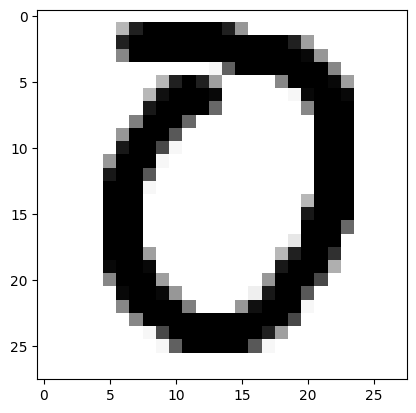

In [23]:
# 1. new data : cv2
import cv2

# 2. Load Image : '../DATA/exams/Numbers/' 내의 모든 이미지 파일 검사
import os
import numpy as np

path = '../DATA/exams/Numbers/'
files = os.listdir(path)
files = [file for file in files if file.endswith('.png')]

# test
for idx, file in enumerate(files):
    plt.imshow(cv2.imread(path + file, cv2.IMREAD_GRAYSCALE), cmap='gray')
    plt.show()
    break

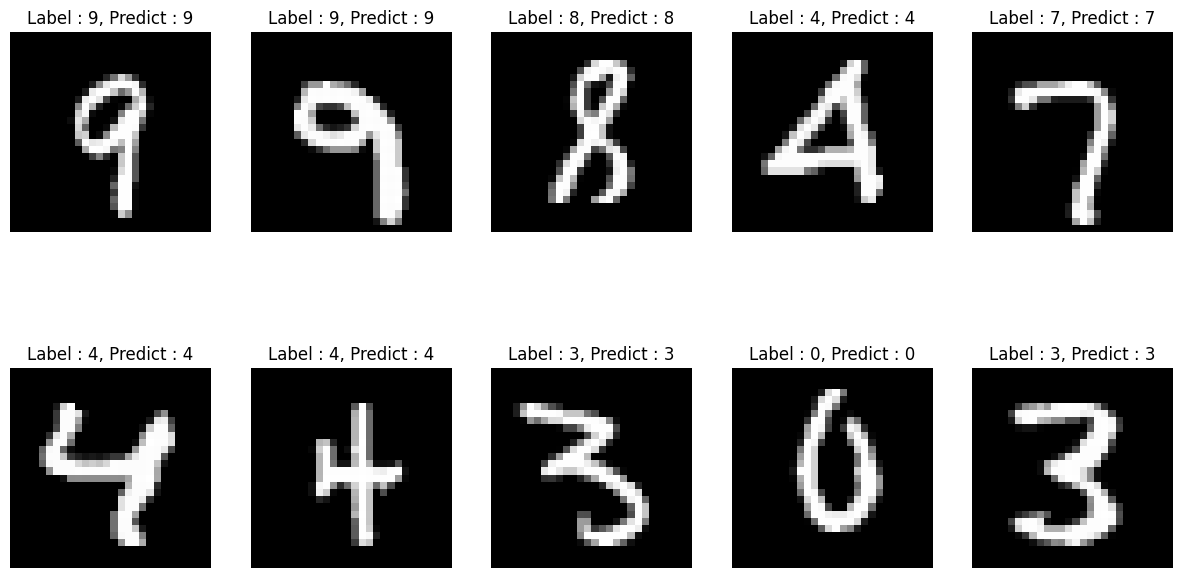

In [29]:
# test_dataloader 중 10개의 이미지를 가져와 예측
fig, ax = plt.subplots(2, 5, figsize=(15, 8))
for idx, (data, target) in enumerate(test_dataloader):
    if idx == 10:
        break
    image = data[0].numpy().reshape(28, 28)
    pred = model(data[0])
    ax[idx//5, idx%5].imshow(image, cmap='gray')
    ax[idx//5, idx%5].set_title(f"Label : {target[0]}, Predict : {pred.argmax().item()}")
    ax[idx//5, idx%5].axis('off')
plt.show()
    

file : 0.png, predict : 8
file : 1.png, predict : 0
file : 2.png, predict : 0
file : 3.png, predict : 9
file : 4.png, predict : 8
file : 5.png, predict : 3
file : 6.png, predict : 0
file : 7.png, predict : 0
file : 8.png, predict : 3
file : 9.png, predict : 0


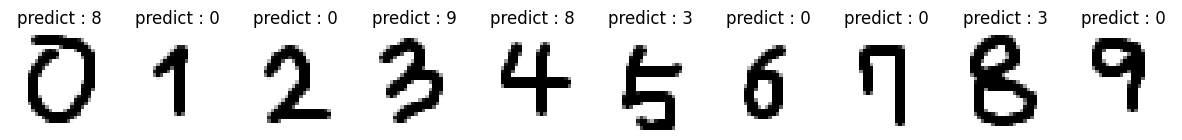

In [30]:
# Predict 진행
model.eval()
with torch.no_grad():
    plt.figure(figsize=(15, 5))
    for idx, file in enumerate(files):
        img = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        # plt.imshow(img, cmap='gray')
        # plt.show()
        img = torch.tensor(img, dtype=torch.float32).view(1,1,28, 28)
        output = model(img)
        pred = output.argmax(dim = 1)
        print(f"file : {file}, predict : {pred.item()}")
        plt.subplot(1, len(files), idx+1)
        plt.imshow(img[0][0], cmap='gray')
        plt.title(f"predict : {pred.item()}")
        plt.axis('off')
    plt.show()

?? 결과가 이상하다  
학습을 마친 모델에 test 파일을 넣으니 잘 예측한다  
그런데 내가 그린 그림은 인식률이 개똥이다  
그래도 모델을 거친 예측 결과가 다양하게 나와서 다행이다  


file : 0.png, predict : 0
file : 1.png, predict : 1
file : 2.png, predict : 2
file : 3.png, predict : 3
file : 4.png, predict : 4
file : 5.png, predict : 5
file : 6.png, predict : 8
file : 7.png, predict : 9
file : 8.png, predict : 3
file : 9.png, predict : 7


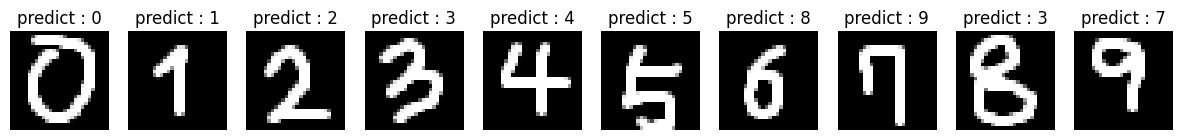

In [33]:
# 색상 반전시켜 예측
model.eval()
with torch.no_grad():
    plt.figure(figsize=(15, 5))
    for idx, file in enumerate(files):
        img = cv2.imread(path + file, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = 255 - img
        # plt.imshow(img, cmap='gray')
        # plt.show()
        img = torch.tensor(img, dtype=torch.float32).view(1,1,28, 28)
        output = model(img)
        pred = output.argmax(dim = 1)
        print(f"file : {file}, predict : {pred.item()}")
        plt.subplot(1, len(files), idx+1)
        plt.imshow(img[0][0], cmap='gray')
        plt.title(f"predict : {pred.item()}")
        plt.axis('off')
    plt.show()


흑백 반전을 하니 예측률이 높아졌다!!  
0/10 => 6/10 으로 나쁘지 않은 수준에 3-6-8, 7-9로 유사한 이미지는 추적한다  
더 완벽한 모델을 만들려면 어떤 파라미터를 조작해야할지 모르겠다.
이러면 과적합인가?